In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Какие признаки есть?
Выделяют количественные (числовые), категориальные и бинарные

### Какие виды визуализации выделяют?
Выделяют визуализацию *по одному* и во *взаимосвязи*

По одному могут рассматривать *количественные* и *категориальные*

Во *взаимосвязи* рассматривают пары: *количественный-количественный*, *количественный-категориальный* и *категориальный-категориальный*

In [12]:
df = pd.read_csv("data/telecom_churn.csv")

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному
## 1.1. Количественные

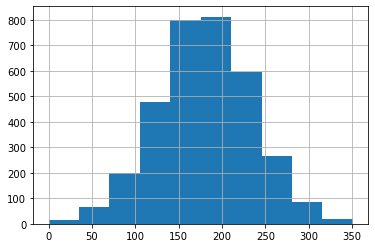

In [15]:
df["Total day minutes"].hist();

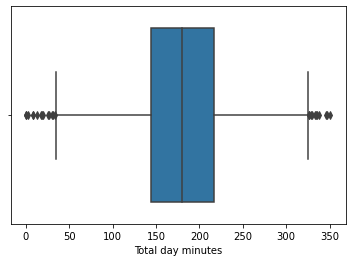

In [18]:
sns.boxplot(x=df["Total day minutes"]);

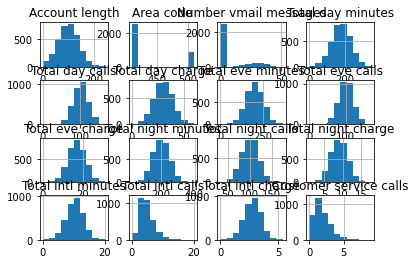

In [19]:
df.hist();

## 1.2 Категориальные (и бинарные)

In [21]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

In [22]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

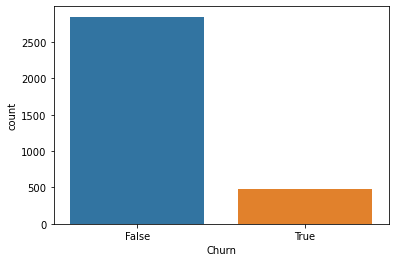

In [26]:
sns.countplot(x=df["Churn"]);

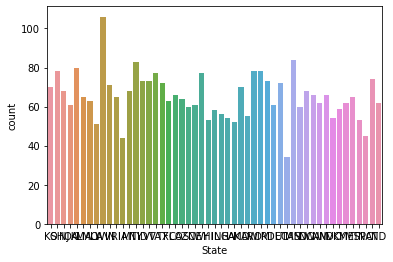

In [28]:
sns.countplot(x=df["State"]);

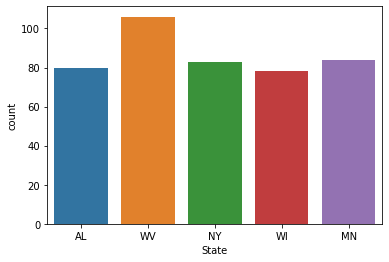

In [33]:
sns.countplot(x=df[df["State"].\
                 isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействие признаков
## 2.1. Количественные-количественные

Отберем все начиления (charge)

In [36]:
features = [f for f in df.columns if "charge" in f]

In [37]:
features

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

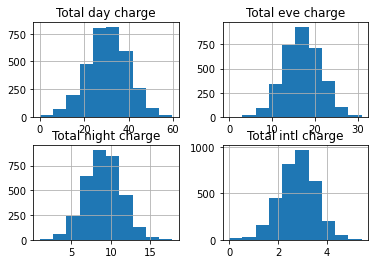

In [38]:
df[features].hist();

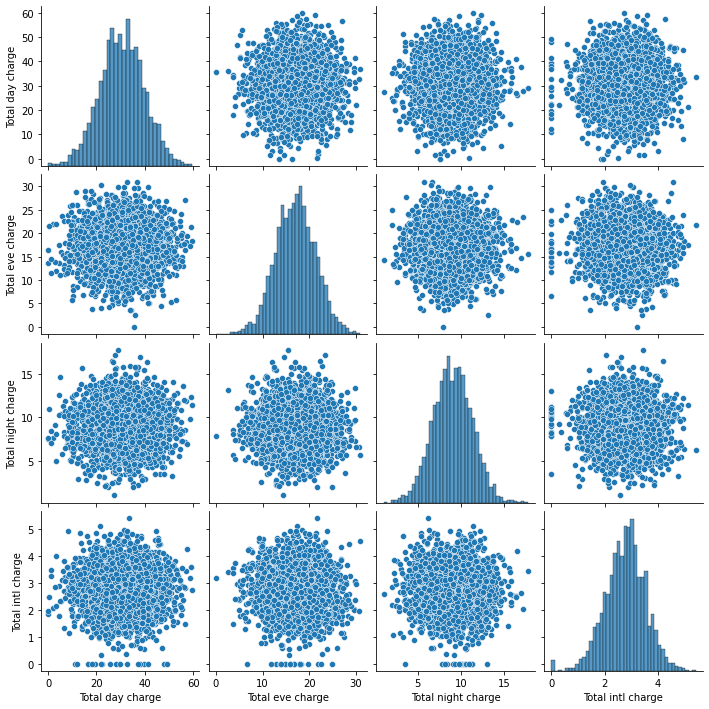

In [39]:
sns.pairplot(df[features]);

In [51]:
df["Churn"].map({False : "blue", True : "orange"}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

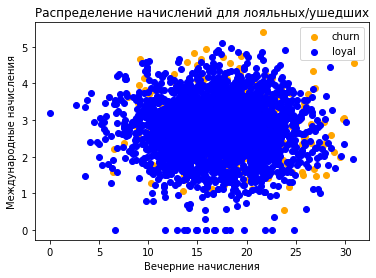

In [55]:
plt.scatter(df[df["Churn"]]["Total eve charge"], df[df["Churn"]]["Total intl charge"],
           color="orange", label="churn");
plt.scatter(df[~df["Churn"]]["Total eve charge"], df[~df["Churn"]]["Total intl charge"],
           color="blue", label="loyal");
plt.xlabel("Вечерние начисления");
plt.ylabel("Международные начисления");
plt.title("Распределение начислений для лояльных/ушедших")
plt.legend();

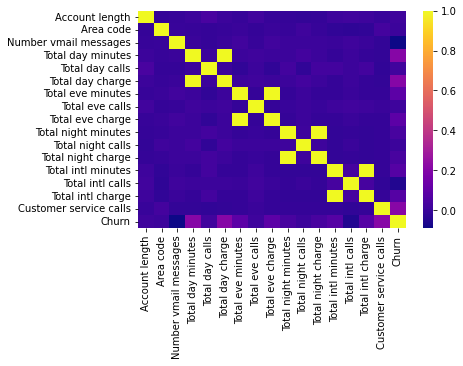

In [61]:
sns.heatmap(df.corr(), cmap="plasma");

In [67]:
df.drop(features, axis=1, inplace=True)

In [68]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total eve minutes', 'Total eve calls',
       'Total night minutes', 'Total night calls', 'Total intl minutes',
       'Total intl calls', 'Customer service calls', 'Churn'],
      dtype='object')

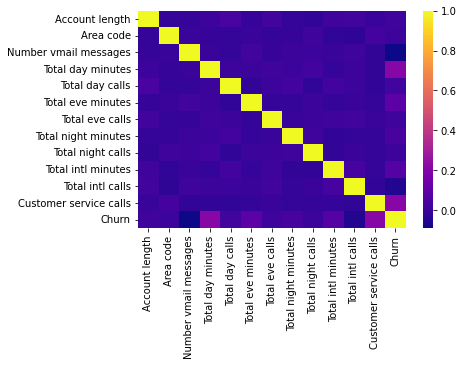

In [69]:
sns.heatmap(df.corr(), cmap="plasma");

## 2.2 Количественный-категориальный (количественный-бинарный)

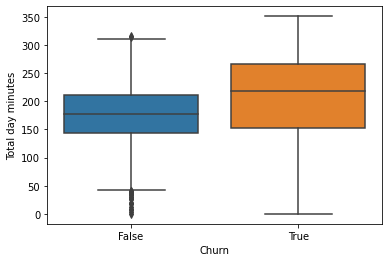

In [71]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

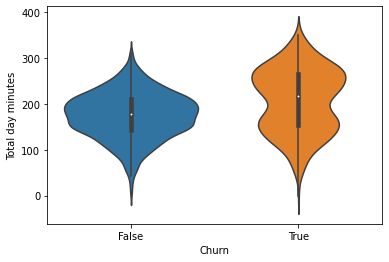

In [72]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

In [74]:
df.groupby("International plan")["Total day minutes"].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

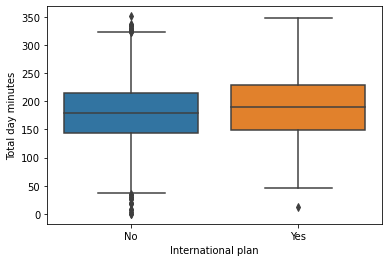

In [75]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

## 2.3 Катеориальный-категориальный (бинарный-бинарный)

In [78]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


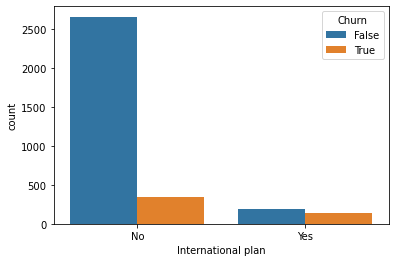

In [79]:
sns.countplot(x="International plan", hue="Churn", data=df);

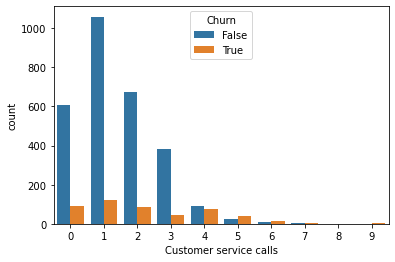

In [81]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);